In [1]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
print(data.head())


   PassengerId  Survived  Pclass                                         Name  \
0          343         0       2                   Collander, Mr. Erik Gustaf   
1           76         0       3                      Moen, Mr. Sigurd Hansen   
2          641         0       3                       Jensen, Mr. Hans Peder   
3          568         0       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672         0       1                       Davidson, Mr. Thornton   

   Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    1  28.0      0      0      248740  13.0000     G6        S  
1    1  25.0      0      0      348123   7.6500  F G73        S  
2    1  20.0      0      0      350050   7.8542     G6        S  
3    0  29.0      0      4      349909  21.0750     G6        S  
4    1  31.0      1      0  F.C. 12750  52.0000    B71        S  


In [2]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
print(x.columns)
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
classifier = tree.DecisionTreeClassifier()  
classifier=classifier.fit(x_train, y_train)   #fitting our model
y_pred=classifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
score:0.7653631284916201


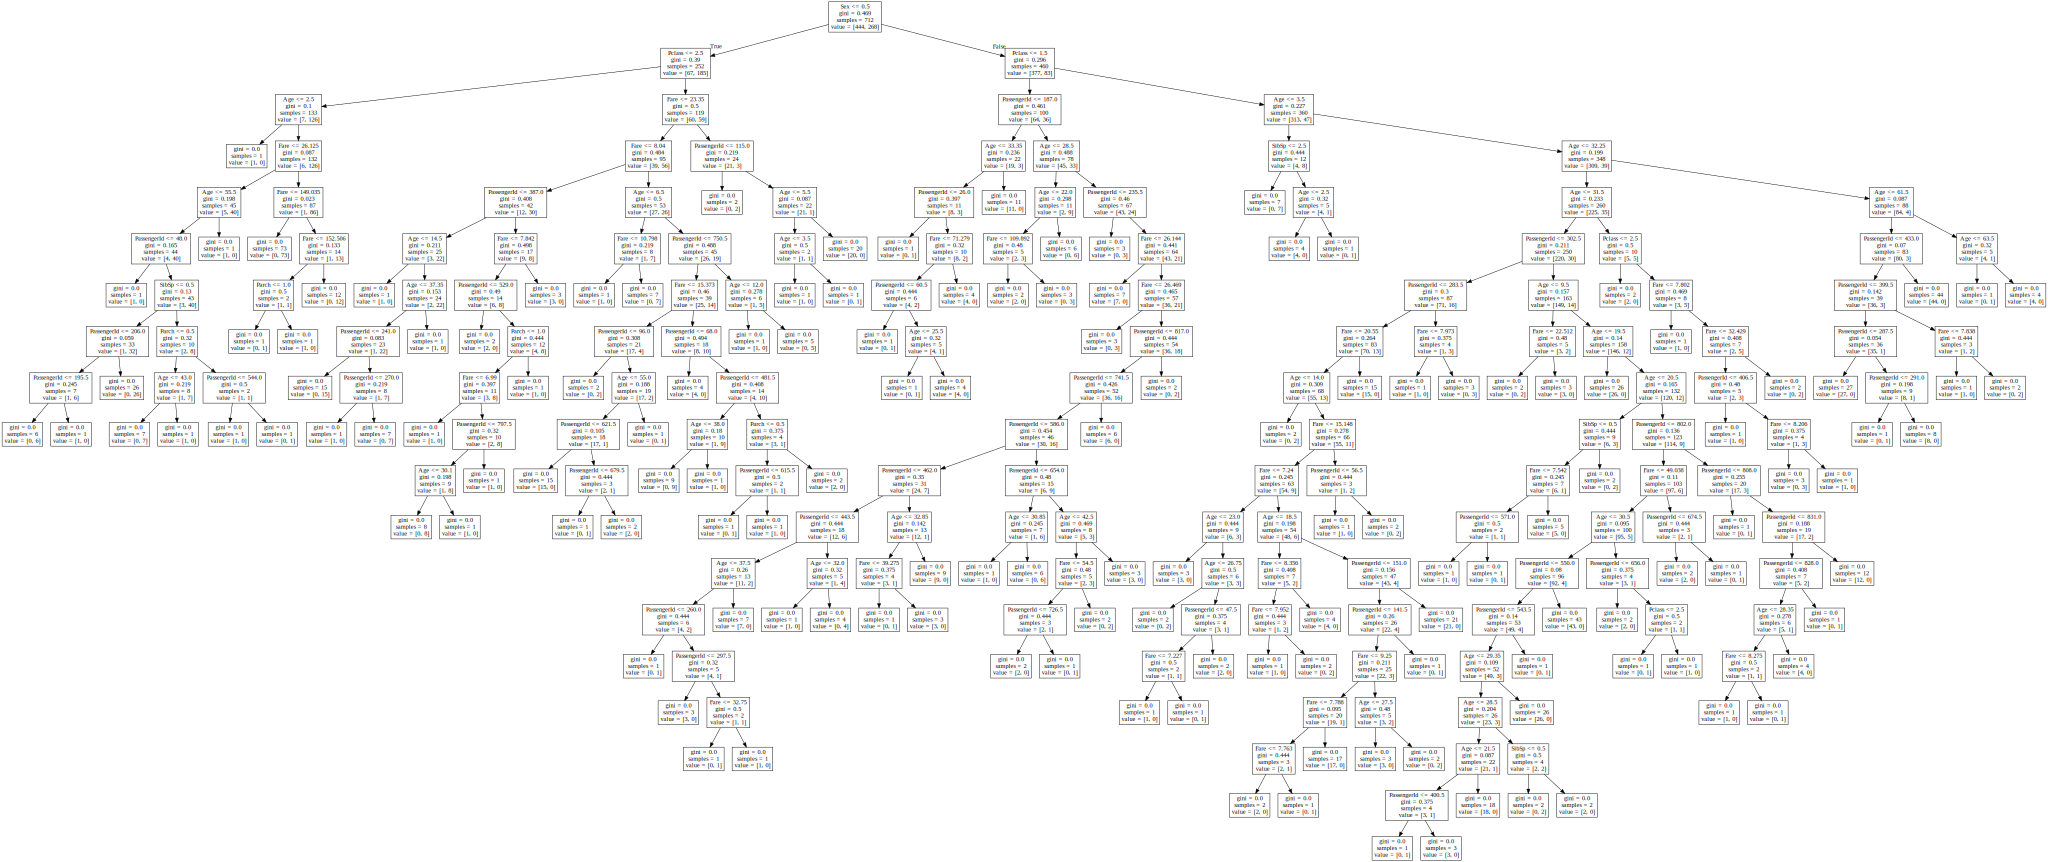

In [3]:
import graphviz
dot_data=tree.export_graphviz(classifier, out_file=None, feature_names = x.columns)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

In [4]:
dclassifier = tree.DecisionTreeClassifier(criterion="gini",splitter="random",max_leaf_nodes=10,
                                         min_samples_leaf=5,max_depth=5) 
dclassifier=dclassifier.fit(x_train, y_train)   #fitting our model
y_pred=dclassifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7597765363128491


In [5]:
dclassifier = tree.DecisionTreeClassifier(criterion="gini",splitter="random",max_leaf_nodes=20,
                                         min_samples_leaf=10,max_depth=5) 
dclassifier=dclassifier.fit(x_train, y_train)   #fitting our model
y_pred=dclassifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7821229050279329


In [6]:
dclassifier = tree.DecisionTreeClassifier(criterion="entropy",splitter="random",max_leaf_nodes=10,
                                         min_samples_leaf=5,max_depth=6) 
dclassifier=dclassifier.fit(x_train, y_train)   #fitting our model
y_pred=dclassifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


In [7]:
dclassifier = tree.DecisionTreeClassifier(criterion="entropy",splitter="best",max_leaf_nodes=10,
                                         min_samples_leaf=5,max_depth=6,random_state=123) 
dclassifier=dclassifier.fit(x_train, y_train)   #fitting our model
y_pred=dclassifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8156424581005587


In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=10,min_samples_split=9)
rfc.fit(x_train,y_train)

predict=rfc.predict(x_test)

print("Accuracy:",accuracy_score(y_test,predict))

Accuracy: 0.8379888268156425


In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=6,min_samples_split=5)
rfc.fit(x_train,y_train)

predict=rfc.predict(x_test)

print("Accuracy:",accuracy_score(y_test,predict))

Accuracy: 0.8435754189944135


In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=20,min_samples_split=9)
rfc.fit(x_train,y_train)

predict=rfc.predict(x_test)

print("Accuracy:",accuracy_score(y_test,predict))

Accuracy: 0.8547486033519553


In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=20,min_samples_split=10)
rfc.fit(x_train,y_train)

predict=rfc.predict(x_test)

print("Accuracy:",accuracy_score(y_test,predict))

Accuracy: 0.8603351955307262


after modifying the parameters we can conclude that Random Forest Classifier is the best for this case.